In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
purchases = pd.read_csv(r'purchases.csv')
purchases.head(5)

,eventTimeStamp,accountCreated,accountDays,configTag,userID,productName,configPrice,usdPrice,moneySpent,league,platform,mediaSource,userCountry
0,2022-12-25 02:35:13.480000 UTC,2022-12-24T17:41:16.914000,1,A,2b1d91d4-83b2-11ed-93d0-068c5498f95d,so_b_new_usa_l1,2.99,3.829725,17.97,1,Android,restricted,AT
1,2022-12-23 00:06:13.410000 UTC,2022-12-22T23:40:49.888000,1,A,10c8a89b-8252-11ed-b602-f686f0f58020,so_usa_starter_1,1.99,1.933385,1.99,0,Android,restricted,BR
2,2022-12-29 18:34:19.580000 UTC,2022-12-29T16:01:57.377000,0,A,1f0508d4-8792-11ed-b602-f686f0f58020,so_ger_starter_1,1.99,2.068978,1.99,1,IPhonePlayer,restricted,BR
3,2022-12-29 18:36:48.360000 UTC,2022-12-29T16:01:57.377000,0,A,1f0508d4-8792-11ed-b602-f686f0f58020,so_usa_starter_1,1.99,2.068978,3.98,1,IPhonePlayer,restricted,BR
4,2022-12-29 18:58:31.100000 UTC,2022-12-29T16:01:57.377000,0,A,1f0508d4-8792-11ed-b602-f686f0f58020,so_usa_willys_1_2,2.99,3.207865,6.97,1,IPhonePlayer,restricted,BR


In [4]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826 entries, 0 to 3825
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   eventTimeStamp  3826 non-null   object 
 1   accountCreated  3826 non-null   object 
 2   accountDays     3826 non-null   int64  
 3   configTag       3822 non-null   object 
 4   userID          3826 non-null   object 
 5   productName     3826 non-null   object 
 6   configPrice     3826 non-null   float64
 7   usdPrice        3826 non-null   float64
 8   moneySpent      3826 non-null   float64
 9   league          3826 non-null   int64  
 10  platform        3826 non-null   object 
 11  mediaSource     3826 non-null   object 
 12  userCountry     3826 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 388.7+ KB


In [5]:
launch = pd.read_csv('launch.csv')
launch.head(5)

,eventTimeStamp,accountCreated,accountDays,configTag,userID,moneySpent,platform,mediaSource,userCountry
0,2023-02-03 15:39:51.32 UTC,2023-01-01 13:33:12.554,33,B,d6a64f2f-89d8-11ed-93d0-068c5498f95d,0.0,Android,Organic,ZA
1,2023-01-06 01:47:18.39 UTC,2023-01-03 14:05:41.647,3,B,b53a08cb-8b6f-11ed-b602-f686f0f58020,0.0,IOS,restricted,JO
2,2023-01-04 19:35:35.36 UTC,2022-12-27 19:39:18.877,8,A,2788992c-861e-11ed-b602-f686f0f58020,0.0,IOS,Organic,BR
3,2023-01-01 19:32:48.95 UTC,2023-01-03 23:11:06.649,-2,A,e6d8ce24-8bbb-11ed-93d0-068c5498f95d,0.0,Android,Organic,PH
4,2023-01-04 23:50:26.41 UTC,2022-12-05 17:54:05.381,30,A,cf4f3578-74c5-11ed-9d04-6ae896912cdb,0.0,Android,FB,ES


In [6]:
launch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676698 entries, 0 to 676697
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   eventTimeStamp  676698 non-null  object 
 1   accountCreated  676698 non-null  object 
 2   accountDays     676698 non-null  int64  
 3   configTag       676114 non-null  object 
 4   userID          676698 non-null  object 
 5   moneySpent      676698 non-null  float64
 6   platform        676698 non-null  object 
 7   mediaSource     676698 non-null  object 
 8   userCountry     676566 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 46.5+ MB


In [7]:
purchases = purchases[(purchases['moneySpent'] < percentile(purchases['moneySpent'], 95)) & (purchases['accountCreated'] >= '2022-12-22')]

In [8]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   eventTimeStamp  2234 non-null   object 
 1   accountCreated  2234 non-null   object 
 2   accountDays     2234 non-null   int64  
 3   configTag       2231 non-null   object 
 4   userID          2234 non-null   object 
 5   productName     2234 non-null   object 
 6   configPrice     2234 non-null   float64
 7   usdPrice        2234 non-null   float64
 8   moneySpent      2234 non-null   float64
 9   league          2234 non-null   int64  
 10  platform        2234 non-null   object 
 11  mediaSource     2234 non-null   object 
 12  userCountry     2234 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 244.3+ KB


In [9]:
launch = launch[(launch['moneySpent'] < percentile(launch['moneySpent'], 95)) & (launch['accountCreated'] >= '2022-12-22')]

In [10]:
launch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359905 entries, 0 to 676688
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   eventTimeStamp  359905 non-null  object 
 1   accountCreated  359905 non-null  object 
 2   accountDays     359905 non-null  int64  
 3   configTag       359641 non-null  object 
 4   userID          359905 non-null  object 
 5   moneySpent      359905 non-null  float64
 6   platform        359905 non-null  object 
 7   mediaSource     359905 non-null  object 
 8   userCountry     359780 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 27.5+ MB


In [11]:
launch.groupby('configTag')['userID'].nunique()

configTag
A    40252
B    39682
Name: userID, dtype: int64

In [12]:
purchases.groupby('configTag')['userID'].nunique()

configTag
A    552
B    567
Name: userID, dtype: int64

In [13]:
purchases[purchases['configTag'] == 'A'].describe()

,accountDays,configPrice,usdPrice,moneySpent,league
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000
mean,1.721860,4.885814,5.422629,24.771637,1.068837
std,2.508057,5.481502,5.982228,49.169946,1.207097
min,0.000000,1.990000,1.534768,1.990000,0.000000
25%,0.000000,1.990000,2.354938,1.990000,0.000000
50%,1.000000,2.990000,3.342790,4.990000,1.000000
75%,2.000000,4.990000,5.943370,20.465000,1.000000
max,13.000000,39.990000,49.027237,338.750000,6.000000


In [14]:
purchases[purchases['configTag'] == 'B'].describe()

,accountDays,configPrice,usdPrice,moneySpent,league
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,1.554498,4.685502,5.177674,22.518244,1.054498
std,2.380579,4.467954,4.846543,40.060501,1.170180
min,0.000000,1.990000,1.368507,1.990000,0.000000
25%,0.000000,1.990000,2.437191,2.990000,0.000000
50%,1.000000,2.990000,3.658492,4.985000,1.000000
75%,2.000000,4.990000,5.309414,22.960000,1.000000
max,13.000000,27.990000,31.442698,300.810000,6.000000


In [15]:
cumulative_purchases_A = purchases[purchases['configTag'] == 'A'].groupby('userID')['configPrice'].sum()
cumulative_purchases_B = purchases[purchases['configTag'] == 'B'].groupby('userID')['configPrice'].sum()

In [16]:
cumulative_purchases_A.head()

userID
00164b49-8332-11ed-b602-f686f0f58020    13.97
00860449-86d3-11ed-b602-f686f0f58020     1.99
00bcc295-8629-11ed-b602-f686f0f58020     4.99
0245ad92-82ba-11ed-b602-f686f0f58020     3.98
0330c62a-8ba7-11ed-b602-f686f0f58020     7.97
Name: configPrice, dtype: float64

In [17]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries.round(decimals=2)

In [18]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

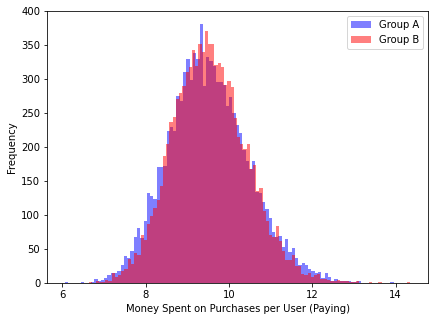

95% confidence interval for mean group A Money Spent on Purchases: [ 7.75 11.57]
95% confidence interval for mean group B Money Spent on Purchases: [ 7.9  11.38]


In [19]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(cumulative_purchases_A.values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(cumulative_purchases_B.values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('Money Spent on Purchases per User (Paying)') 
pylab.show()

print("95% confidence interval for mean group A Money Spent on Purchases:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B Money Spent on Purchases:",  stat_intervals(groupB_median_scores, 0.05))

In [20]:
scipy.stats.mannwhitneyu(cumulative_purchases_A, cumulative_purchases_B, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=157070.5, pvalue=0.4564911039112652)

In [21]:
active_users_A = launch[launch['configTag'] == 'A'].groupby('userID')['moneySpent'].max().reset_index()
active_users_A['moneySpent'] = 0
active_users_B = launch[launch['configTag'] == 'B'].groupby('userID')['moneySpent'].max().reset_index()
active_users_B['moneySpent'] = 0

In [22]:
active_users_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40252 entries, 0 to 40251
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userID      40252 non-null  object
 1   moneySpent  40252 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 629.1+ KB


In [23]:
all_users_A = active_users_A.merge(cumulative_purchases_A, how='outer', on='userID')
all_users_B = active_users_B.merge(cumulative_purchases_B, how='outer', on='userID')

In [24]:
cumulative_purchases_A.info()

<class 'pandas.core.series.Series'>
Index: 552 entries, 00164b49-8332-11ed-b602-f686f0f58020 to ffefc5d3-851f-11ed-93d0-068c5498f95d
Series name: configPrice
Non-Null Count  Dtype  
--------------  -----  
552 non-null    float64
dtypes: float64(1)
memory usage: 8.6+ KB


In [25]:
all_users_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40252 entries, 0 to 40251
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userID       40252 non-null  object 
 1   moneySpent   40252 non-null  int64  
 2   configPrice  552 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [26]:
all_users_A['moneySpent'] = 0
all_users_B['moneySpent'] = 0

In [27]:
all_users_A.describe()

,moneySpent,configPrice
count,40252.0,552.000000
mean,0.0,9.514946
std,0.0,22.471331
min,0.0,1.990000
25%,0.0,1.990000
50%,0.0,3.980000
75%,0.0,7.970000
max,0.0,251.820000


In [28]:
all_users_A['moneySpent'] = all_users_A['moneySpent'] + all_users_A['configPrice']
all_users_B['moneySpent'] = all_users_B['moneySpent'] + all_users_B['configPrice']

In [29]:
all_users_A['moneySpent'] = all_users_A['moneySpent'].fillna(0)
all_users_B['moneySpent'] = all_users_B['moneySpent'].fillna(0)

In [30]:
all_users_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40252 entries, 0 to 40251
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userID       40252 non-null  object 
 1   moneySpent   40252 non-null  float64
 2   configPrice  552 non-null    float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [31]:
all_users_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39682 entries, 0 to 39681
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userID       39682 non-null  object 
 1   moneySpent   39682 non-null  float64
 2   configPrice  567 non-null    float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


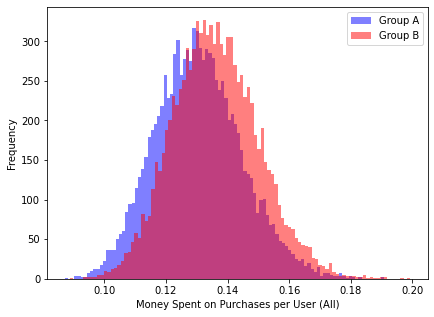

95% confidence interval for mean group A Money Spent on Purchases: [0.1  0.16]
95% confidence interval for mean group B Money Spent on Purchases: [0.11 0.17]


In [32]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(all_users_A['moneySpent'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(all_users_B['moneySpent'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('Money Spent on Purchases per User (All)') 
pylab.show()

print("95% confidence interval for mean group A Money Spent on Purchases:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B Money Spent on Purchases:",  stat_intervals(groupB_median_scores, 0.05))

In [33]:
scipy.stats.mannwhitneyu(all_users_A['moneySpent'].values, all_users_B['moneySpent'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=798181300.5, pvalue=0.7551950271061476)

In [49]:
[sum(all_users_A['moneySpent']), sum(all_users_B['moneySpent'])]

[5252.25, 5416.4400000000005]

In [34]:
purchases_7day_A = purchases[(purchases['configTag'] == 'A') & (purchases['accountDays'] <= 7)].groupby('userID')['configPrice'].sum()
purchases_7day_B = purchases[(purchases['configTag'] == 'B') & (purchases['accountDays'] <= 7)].groupby('userID')['configPrice'].sum()

In [35]:
purchases_7day_A.describe()

count    540.000000
mean       9.229204
std       21.481658
min        1.990000
25%        1.990000
50%        3.980000
75%        7.970000
max      234.860000
Name: configPrice, dtype: float64

In [36]:
purchases_7day_B.describe()

count    551.000000
mean       9.332033
std       20.815579
min        1.990000
25%        1.990000
50%        3.990000
75%        7.970000
max      243.790000
Name: configPrice, dtype: float64

In [37]:
active_users_7day_A = launch[(launch['configTag'] == 'A') & (launch['accountDays'] <= 7)].groupby('userID')['moneySpent'].max().reset_index()
active_users_7day_A['moneySpent'] = 0
active_users_7day_B = launch[(launch['configTag'] == 'B') & (launch['accountDays'] <= 7)].groupby('userID')['moneySpent'].max().reset_index()
active_users_7day_B['moneySpent'] = 0

In [38]:
all_users_7day_A = active_users_7day_A.merge(purchases_7day_A, how='outer', on='userID')
all_users_7day_B = active_users_7day_B.merge(purchases_7day_B, how='outer', on='userID')

In [39]:
all_users_7day_A['moneySpent'] = 0
all_users_7day_B['moneySpent'] = 0

In [40]:
all_users_7day_A['moneySpent'] = all_users_7day_A['moneySpent'] + all_users_7day_A['configPrice']
all_users_7day_B['moneySpent'] = all_users_7day_B['moneySpent'] + all_users_7day_B['configPrice']

In [41]:
all_users_7day_A['moneySpent'] = all_users_7day_A['moneySpent'].fillna(0)
all_users_7day_B['moneySpent'] = all_users_7day_B['moneySpent'].fillna(0)

In [42]:
all_users_7day_A.describe()

,moneySpent,configPrice
count,40213.000000,540.000000
mean,0.123934,9.229204
std,2.704422,21.481658
min,0.000000,1.990000
25%,0.000000,1.990000
50%,0.000000,3.980000
75%,0.000000,7.970000
max,234.860000,234.860000


In [43]:
all_users_7day_B.describe()

,moneySpent,configPrice
count,39681.000000,551.000000
mean,0.129582,9.332033
std,2.682958,20.815579
min,0.000000,1.990000
25%,0.000000,1.990000
50%,0.000000,3.990000
75%,0.000000,7.970000
max,243.790000,243.790000


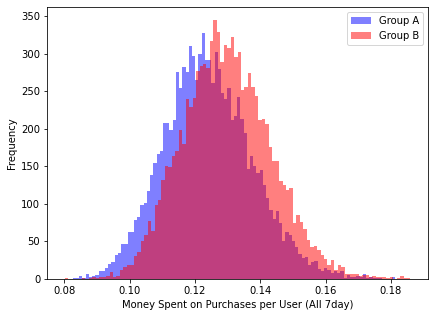

95% confidence interval for mean group A Money Spent on Purchases: [0.1  0.15]
95% confidence interval for mean group B Money Spent on Purchases: [0.11 0.16]


In [46]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(all_users_7day_A['moneySpent'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(all_users_7day_B['moneySpent'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('Money Spent on Purchases per User (All 7day)') 
pylab.show()

print("95% confidence interval for mean group A Money Spent on Purchases:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B Money Spent on Purchases:",  stat_intervals(groupB_median_scores, 0.05))

In [45]:
scipy.stats.mannwhitneyu(all_users_7day_A['moneySpent'].values, all_users_7day_B['moneySpent'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=797479457.5, pvalue=0.7120762152365597)

In [48]:
[sum(all_users_7day_A['moneySpent']), sum(all_users_7day_B['moneySpent'])]

[4983.77, 5141.95]

In [51]:
[active_users_7day_A['userID'].nunique(), active_users_7day_B['userID'].nunique()]

[40213, 39681]

In [53]:
[purchases[(purchases['configTag'] == 'A') & (purchases['accountDays'] <= 7)]['userID'].nunique(), purchases[(purchases['configTag'] == 'B') & (purchases['accountDays'] <= 7)]['userID'].nunique()] 

[540, 551]

In [61]:
print('Conversion to Purchase 7day Tag A: {0: .3f}%'.format((purchases[(purchases['configTag'] == 'A') & (purchases['accountDays'] <= 7)]['userID'].nunique()) / (active_users_7day_A['userID'].nunique()) * 100))
print('Conversion to Purchase 7day Tag B: {0: .3f}%'.format((purchases[(purchases['configTag'] == 'B') & (purchases['accountDays'] <= 7)]['userID'].nunique()) / (active_users_7day_B['userID'].nunique()) * 100))

Conversion to Purchase 7day Tag A:  1.343%
Conversion to Purchase 7day Tag B:  1.389%
